## ANEXO 3: Análisis de Clusters

### Carga y limpieza de datos

In [1]:
import pandas as pd

# carga de datos
df_full = pd.read_pickle(r'..\data\short.pkl')
X=df_full

# Mostrar las regiones únicas antes de la codificación
print(X["REGION"].unique())

# Diccionario de mapeo manual de las regiones
region_mapping = {
    'ARICA Y PARINACOTA': 1,
    'TARAPACÁ': 2,
    'ANTOFAGASTA': 3,
    'ATACAMA': 4,
    'COQUIMBO': 5,
    'VALPARAÍSO': 6,
    'METROPOLITANA DE SANTIAGO': 7,
    "LIBERTADOR GENERAL BERNARDO O'HIGGINS": 8,
    'MAULE': 9,
    'ÑUBLE': 10,
    'BIOBÍO': 11,
    'LA ARAUCANÍA': 12,
    'LOS RÍOS': 13,
    'LOS LAGOS': 14,
    'AYSÉN DEL GENERAL CARLOS IBÁÑEZ DEL CAMPO': 15,
    'MAGALLANES Y DE LA ANTÁRTICA CHILENA': 16
}

# Aplicar el mapeo manual a la columna "REGION"
X['REGION'] = X['REGION'].map(region_mapping)

# Mostrar las regiones después de la codificación
print(X["REGION"].unique())


string_columns = ["COMUNA", "PARENTESCO", "PUEBLO_ORIGINARIO", "LUGAR_NAC", "LUGAR_NAC_PAIS", "N_HOGAR", "N_PERSONA", "ES_URBANO", "N_VIVIENDA", "DISTRITO", "ZONA", "LUGAR_NAC_PAIS", "ASISTE_EDUCACION", "ES_ORIGINARIO", "TRABAJO_REMUNERADO"]
X.drop(columns=string_columns, inplace=True)

# Guardar medias y desviaciones estándar antes de la normalización
means = X.mean()
stds = X.std()

# Normalizar columnas numéricas
normalize_columns = ["REGION", "CENTROIDE_X_DIST", "CENTROIDE_Y_DIST", "POBLACION_DIST", "SUPERFICIE_DIST", "DENSIDAD_DIST", "EDAD", "ANOS_ESCOLARIDAD", "TOTAL_HIJOS"]
for column_name in normalize_columns:
    X[column_name] = (X[column_name] - means[column_name]) / stds[column_name]
X

['ARICA Y PARINACOTA' 'LOS RÍOS' 'METROPOLITANA DE SANTIAGO'
 'MAGALLANES Y DE LA ANTÁRTICA CHILENA'
 'AYSÉN DEL GENERAL CARLOS IBÁÑEZ DEL CAMPO' 'LOS LAGOS' 'LA ARAUCANÍA'
 'ÑUBLE' 'BIOBÍO' 'MAULE' "LIBERTADOR GENERAL BERNARDO O'HIGGINS"
 'VALPARAÍSO' 'COQUIMBO' 'ATACAMA' 'ANTOFAGASTA' 'TARAPACÁ']
[ 1 13  7 16 15 14 12 10 11  9  8  6  5  4  3  2]


,REGION,CENTROIDE_X_DIST,CENTROIDE_Y_DIST,POBLACION_DIST,SUPERFICIE_DIST,DENSIDAD_DIST,EDAD,ANOS_ESCOLARIDAD,TOTAL_HIJOS,HIJO_RECIENTE
0,-2.371917,1.404300,3.238686,-1.212242,1.597822,-0.820263,0.235036,-1.867748,0.544907,0
1,-2.371917,1.404300,3.238686,-1.212242,1.597822,-0.820263,1.039182,-1.867748,0.544907,0
2,-2.371917,1.404300,3.238686,-1.212242,1.597822,-0.820263,1.039182,-1.280670,1.294858,0
3,-2.371917,1.404300,3.238686,-1.212242,1.597822,-0.820263,-0.368073,-1.867748,2.794759,0
4,-2.371917,1.404300,3.238686,-1.212242,1.597822,-0.820263,0.335554,-0.106515,-0.954994,0
...,...,...,...,...,...,...,...,...,...,...
4370988,-2.028752,0.927719,2.749776,1.703400,-0.096420,-0.610547,1.441255,-0.400054,0.544907,0
4370989,-2.028752,0.927719,2.749776,1.703400,-0.096420,-0.610547,-0.669628,-0.106515,-0.954994,0
4370990,-2.028752,0.927719,2.749776,1.703400,-0.096420,-0.610547,-0.870665,0.774102,-0.954994,0
4370991,-2.028752,0.927719,2.749776,1.703400,-0.096420,-0.610547,0.637109,1.948257,1.294858,0


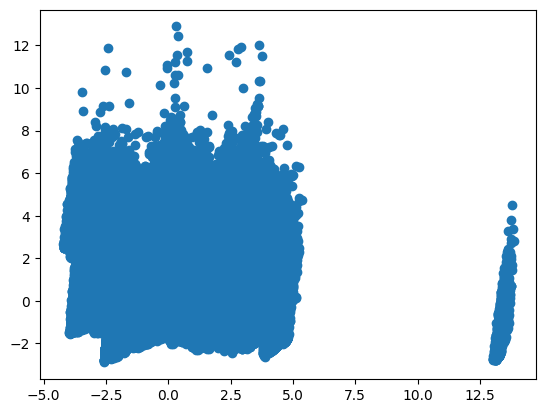

In [6]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
pca.components_
df_pca = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])

plt.figure()
plt.scatter(df_pca['PCA1'], df_pca['PCA2'])
plt.show()


### K-Means con 5 clusters


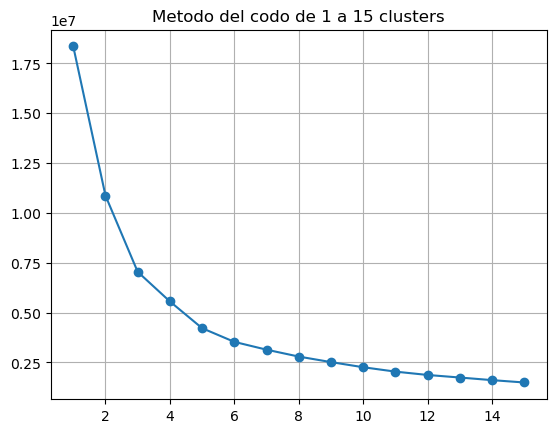

In [ ]:
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

data_kmeans = X_pca

sse = []
clusters = list(range(1, 16))
for k in clusters:
    kmeans = KMeans(n_clusters=k, n_init=10).fit(data_kmeans)
    sse.append(kmeans.inertia_)

plt.plot(clusters, sse, marker="o")
plt.title("Metodo del codo de 1 a 15 clusters")
plt.grid(True)
plt.show()

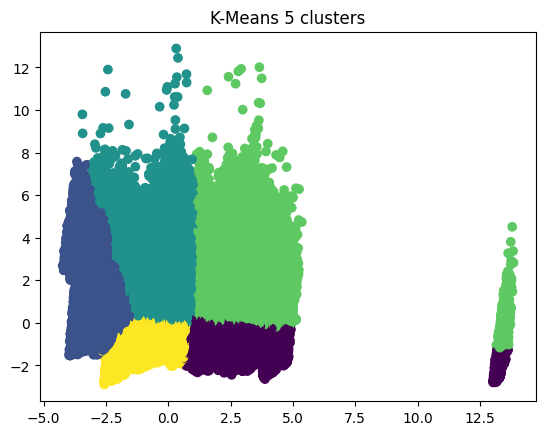

In [ ]:
# K-MEANS CON 5 CLUSTERS
from sklearn.cluster import KMeans
from sklearn import datasets

import warnings
warnings.filterwarnings('ignore')

data_kmeans = X_pca
kmeans5 = KMeans(n_clusters=5, n_init=10, random_state=20).fit(data_kmeans)

plt.scatter(data_kmeans[:, 0],data_kmeans[:, 1], c=kmeans5.labels_, cmap='viridis')
plt.title("K-Means 5 clusters")
plt.show()

### Análisis K-Means 5

           REGION  CENTROIDE_X_DIST  CENTROIDE_Y_DIST  POBLACION_DIST  \
cluster                                                                 
0        1.352073         -1.099798         -1.066099       -0.274655   
1       -1.859692          0.998269          2.432473        0.286737   
2       -0.367423          0.326892          0.188523        0.086258   
3        1.339005         -1.079540         -1.050201       -0.383329   
4       -0.361936          0.368315          0.177026        0.118925   

         SUPERFICIE_DIST  DENSIDAD_DIST      EDAD  ANOS_ESCOLARIDAD  \
cluster                                                               
0               0.001875      -0.488928 -0.665484          0.220455   
1               0.895412      -0.078824 -0.026427          0.023368   
2              -0.089849       0.002701  0.817109         -0.284646   
3               0.127801      -0.590273  0.873060         -0.640967   
4              -0.145081       0.413780 -0.651696          0.3

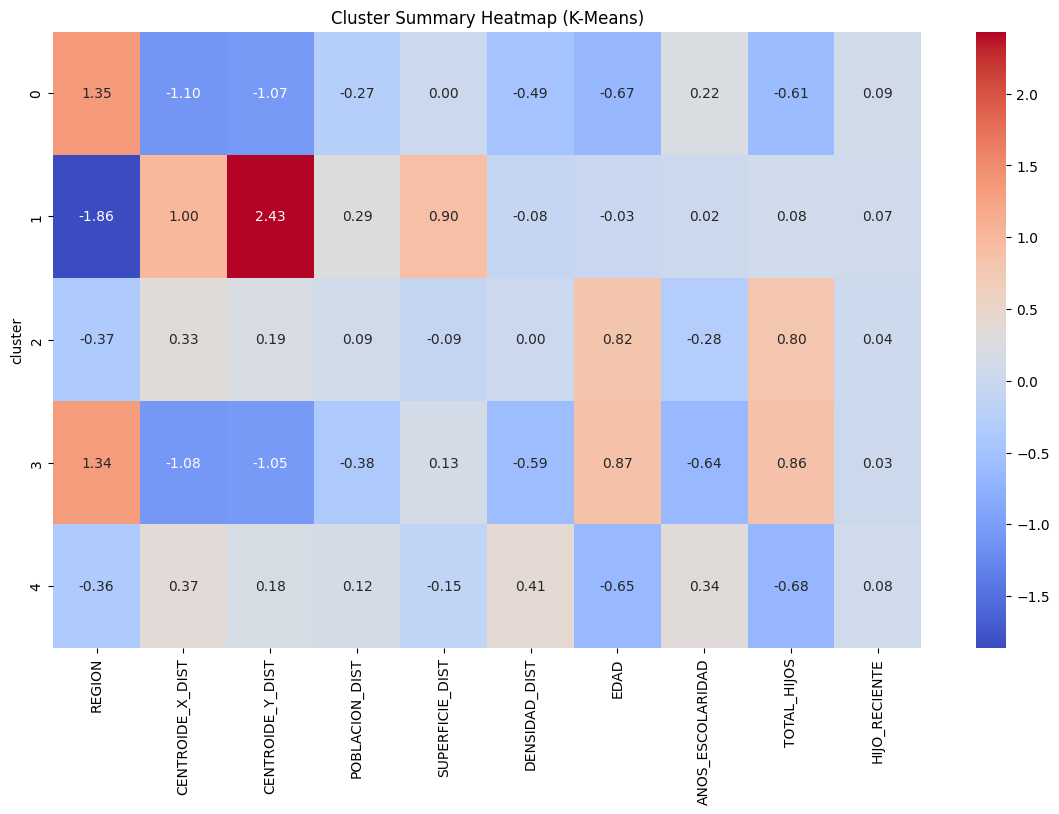

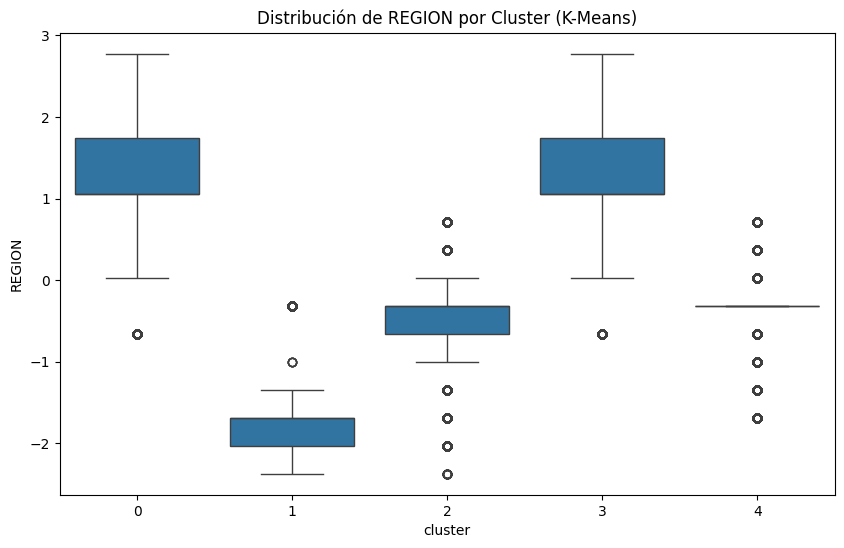

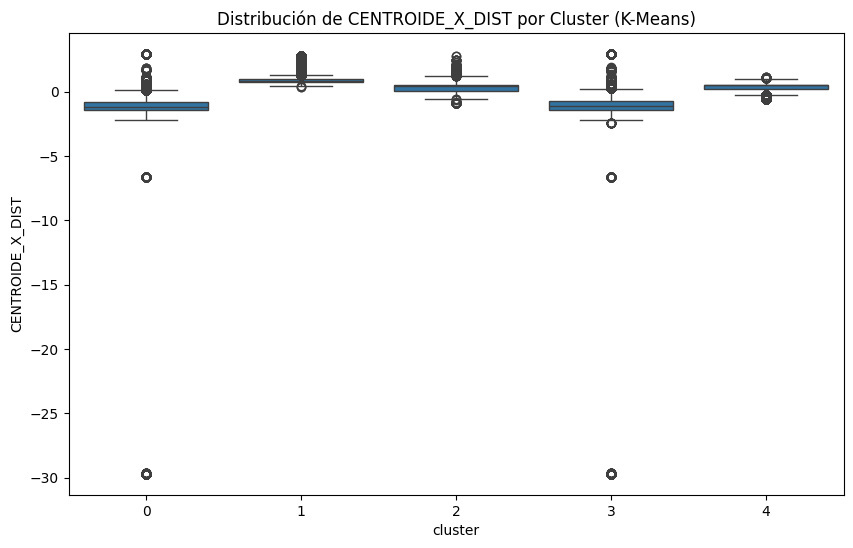

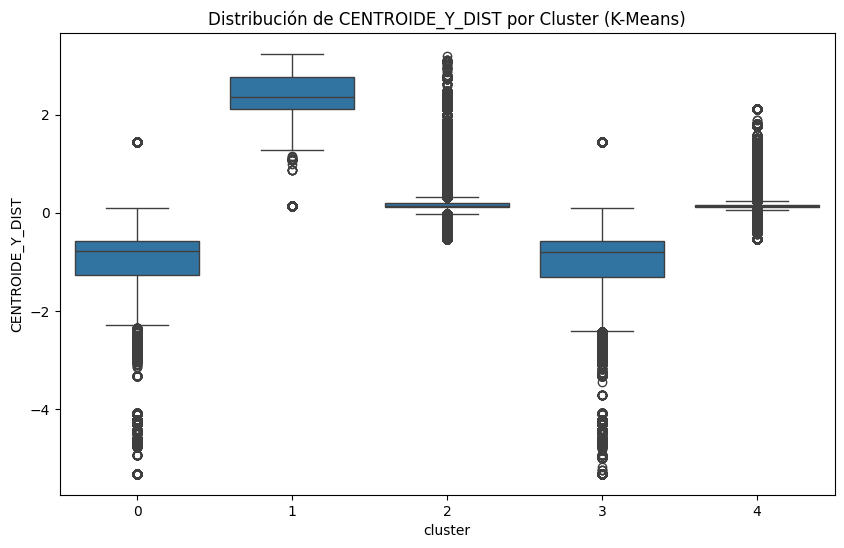

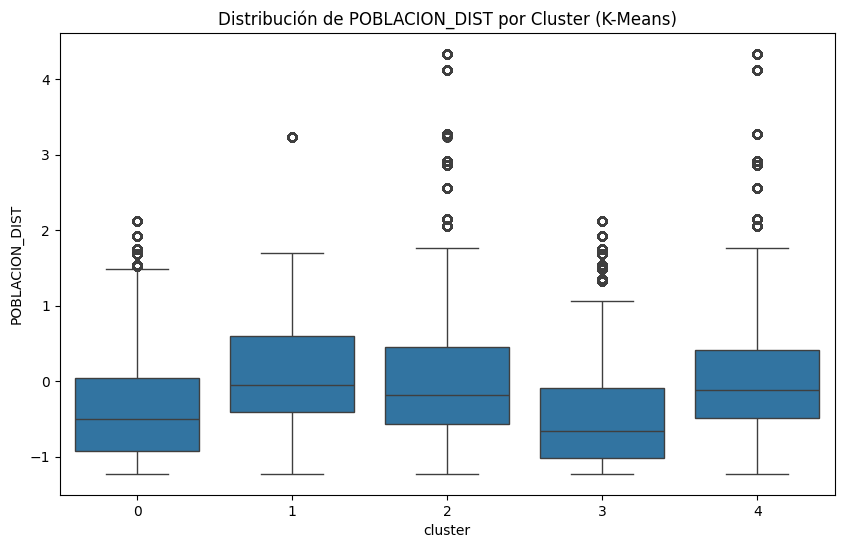

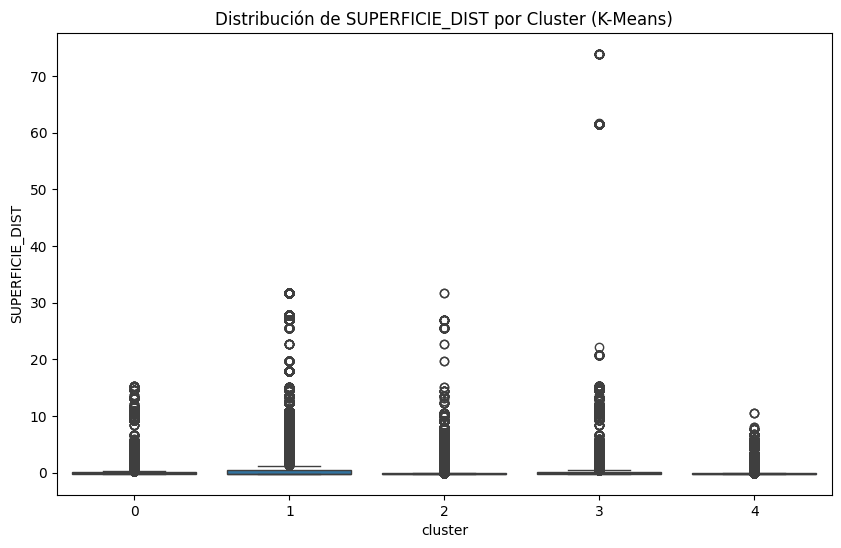

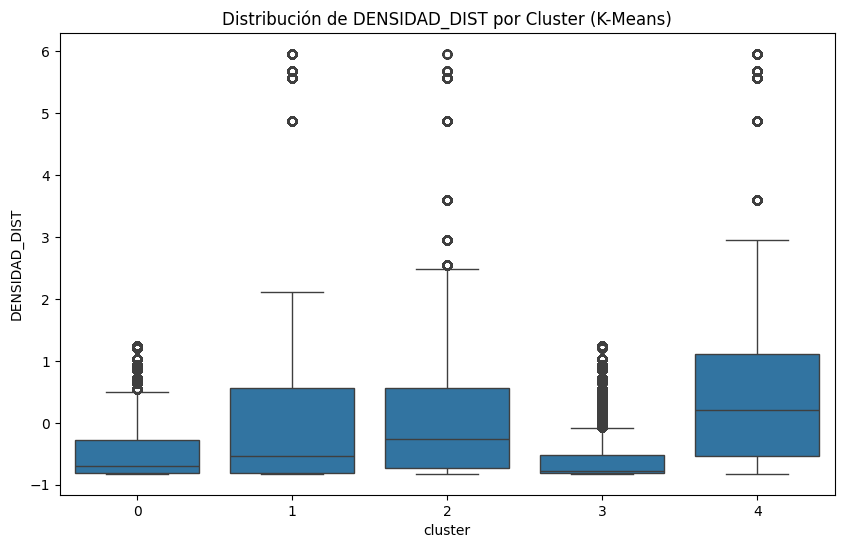

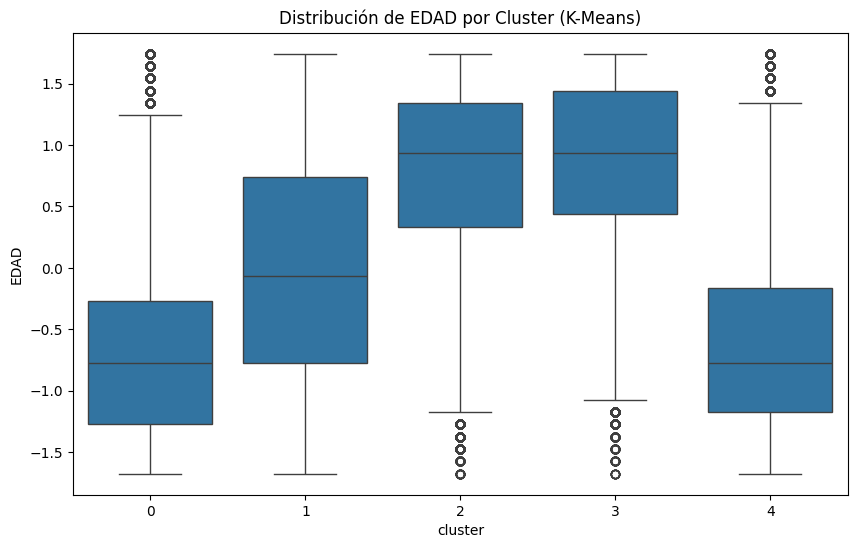

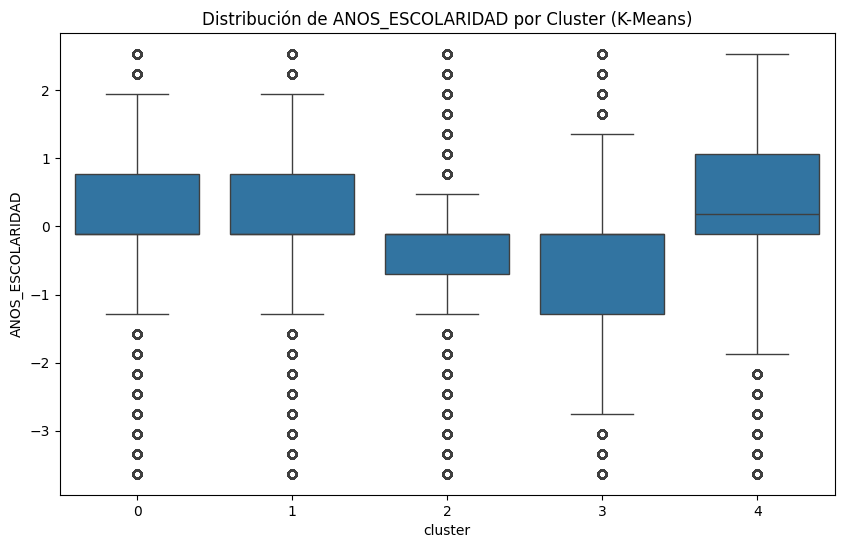

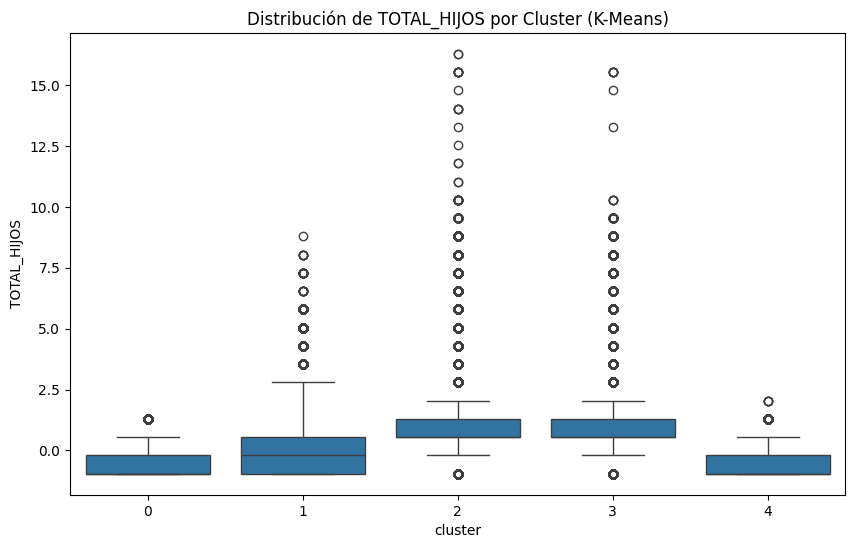

In [ ]:
import seaborn as sns

# Asignar los clusters al conjunto de datos original
df_pca_kmeans = df_pca.copy()
df_pca_kmeans['cluster'] = kmeans5.labels_

# Fusionar con datos originales
df_pca_kmeans['index'] = df_pca_kmeans.index
X['index'] = X.index
df_merged_kmeans = pd.merge(X, df_pca_kmeans[['index', 'cluster']], on='index', how='inner')
df_merged_kmeans.drop(columns=['index'], inplace=True)

# Resumen estadístico de las características por cluster con valores originales
cluster_summary_kmeans = df_merged_kmeans.groupby('cluster').mean()
print(cluster_summary_kmeans)

# Visualización
plt.figure(figsize=(14, 8))
sns.heatmap(cluster_summary_kmeans, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Cluster Summary Heatmap (K-Means)")
plt.show()

# Visualización detallada de cada variable por cluster con valores originales
for column in normalize_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='cluster', y=column, data=df_merged_kmeans)
    plt.title(f"Distribución de {column} por Cluster (K-Means)")
    plt.show()

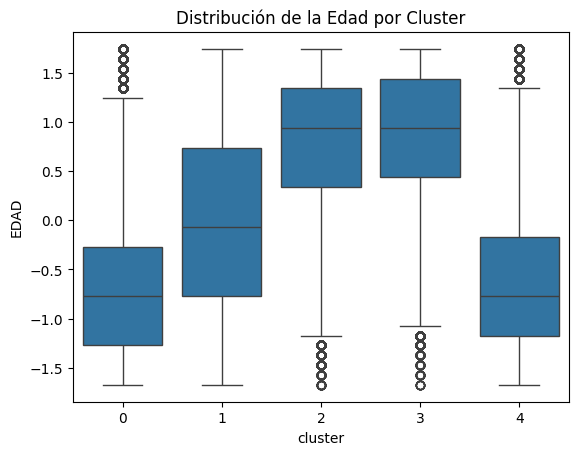

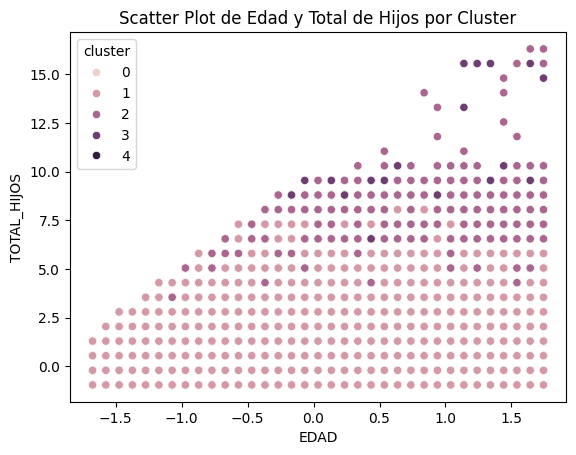

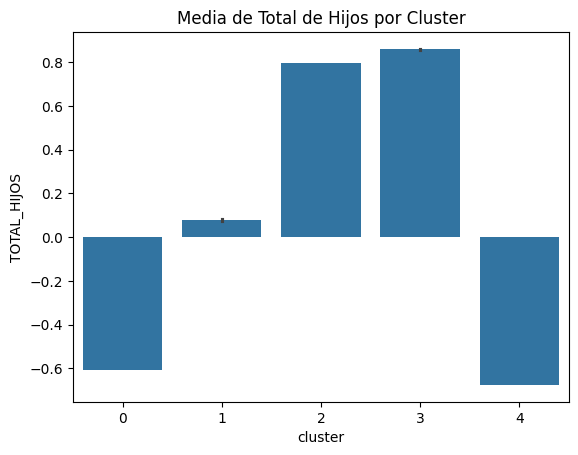

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ejemplo de boxplot para una variable específica
sns.boxplot(x='cluster', y='EDAD', data=df_merged_kmeans)
plt.title('Distribución de la Edad por Cluster')
plt.show()

# Ejemplo de scatter plot para dos variables específicas
sns.scatterplot(x='EDAD', y='TOTAL_HIJOS', hue='cluster', data=df_merged_kmeans)
plt.title('Scatter Plot de Edad y Total de Hijos por Cluster')
plt.show()

# Ejemplo de bar plot para la media de una variable categórica
sns.barplot(x='cluster', y='TOTAL_HIJOS', data=df_merged_kmeans)
plt.title('Media de Total de Hijos por Cluster')
plt.show()


cluster
0    0.088063
1    0.070364
2    0.035872
3    0.029930
4    0.083763
dtype: float64


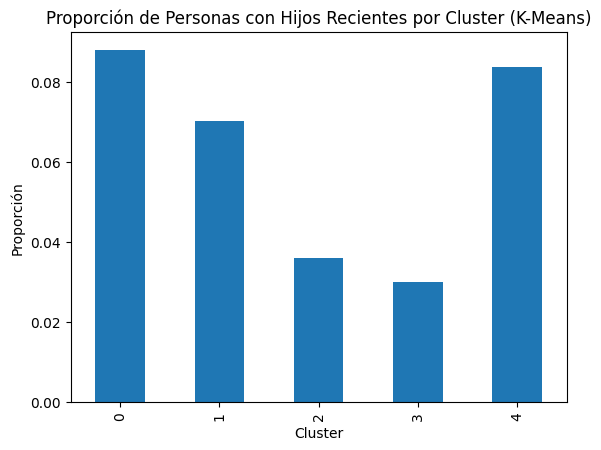

In [ ]:
# Supongamos que tienes una columna 'HIJOS_RECIENTES' que indica si la persona tiene hijos recientes
# Contar el número de personas con hijos recientes en cada cluster
recent_births_by_cluster = df_merged_kmeans[df_merged_kmeans['HIJO_RECIENTE'] > 0].groupby('cluster').size()
total_by_cluster = df_merged_kmeans.groupby('cluster').size()

# Calcular la proporción de personas con hijos recientes en cada cluster
proportion_recent_births = recent_births_by_cluster / total_by_cluster
print(proportion_recent_births)

# Visualización
proportion_recent_births.plot(kind='bar')
plt.title('Proporción de Personas con Hijos Recientes por Cluster (K-Means)')
plt.xlabel('Cluster')
plt.ylabel('Proporción')
plt.show()


### Downsampling

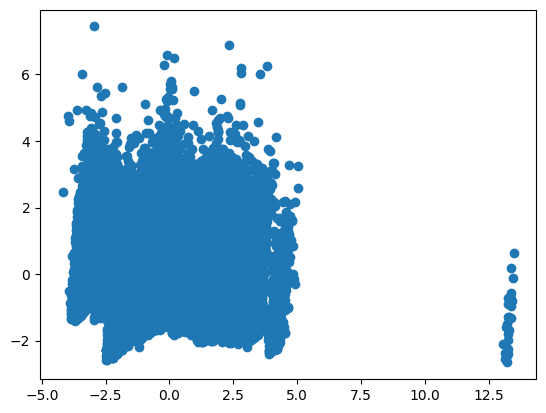

In [7]:
#bajarle al SAMPLING para que se la pueda

subsample_size = 40000  # Número de muestras a tomar
df_pca_subsample = df_pca.sample(n=subsample_size, random_state=42)

plt.figure()
plt.scatter(df_pca_subsample['PCA1'], df_pca_subsample['PCA2'])
plt.show()

### Clustering jerárquico

In [8]:
from scipy.cluster.hierarchy import dendrogram, linkage

data_jerarquico = df_pca_subsample
complete = linkage(data_jerarquico, method="complete")

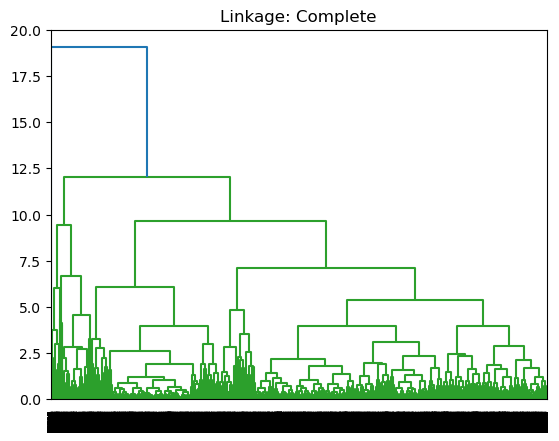

In [ ]:
dendrogram(complete)
plt.title("Linkage: Complete")
plt.show()

9
[5 5 3 ... 5 5 5]


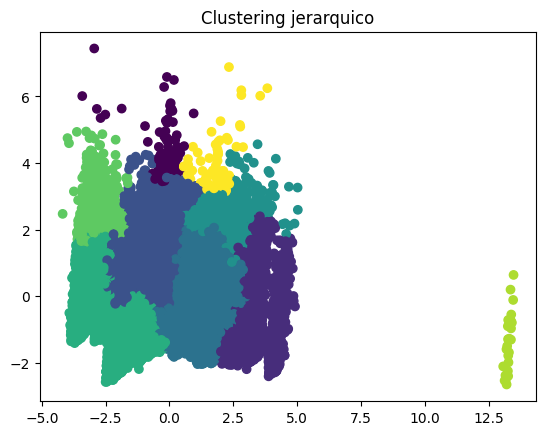

In [9]:
from sklearn.cluster import AgglomerativeClustering
new_X = data_jerarquico.values
ward_dist = AgglomerativeClustering(n_clusters=None, linkage="complete", distance_threshold=5).fit(new_X)
print(ward_dist.n_clusters_)
new_X = data_jerarquico.values
ward_dist = AgglomerativeClustering(n_clusters=None, linkage="complete", distance_threshold=5).fit(new_X)
print(ward_dist.labels_)

plt.scatter(new_X[:, 0],new_X[:, 1], c=ward_dist.labels_)
plt.title("Clustering jerarquico")
plt.show()


### Análisis clustering jerárquico

           REGION  CENTROIDE_X_DIST  CENTROIDE_Y_DIST  POBLACION_DIST  \
cluster                                                                 
0       -1.062667          0.736612          1.192105        0.006782   
1       -0.358550          0.316799          0.185183        0.125752   
2       -0.518622          0.433733          0.385053        0.124164   
3        2.241987         -1.044818         -2.336838       -0.433286   
4        1.045889         -0.907362         -0.718701       -0.265738   
5        1.339894         -1.061645         -1.034888       -0.407503   
6        0.846303         -0.685178         -0.598334       -0.553541   
7       -1.902569          1.048124          2.502416        0.301188   
8       -0.656091        -29.681969          1.433935       -0.806570   

         SUPERFICIE_DIST  DENSIDAD_DIST      EDAD  ANOS_ESCOLARIDAD  \
cluster                                                               
0               2.246835      -0.291243  1.182858     

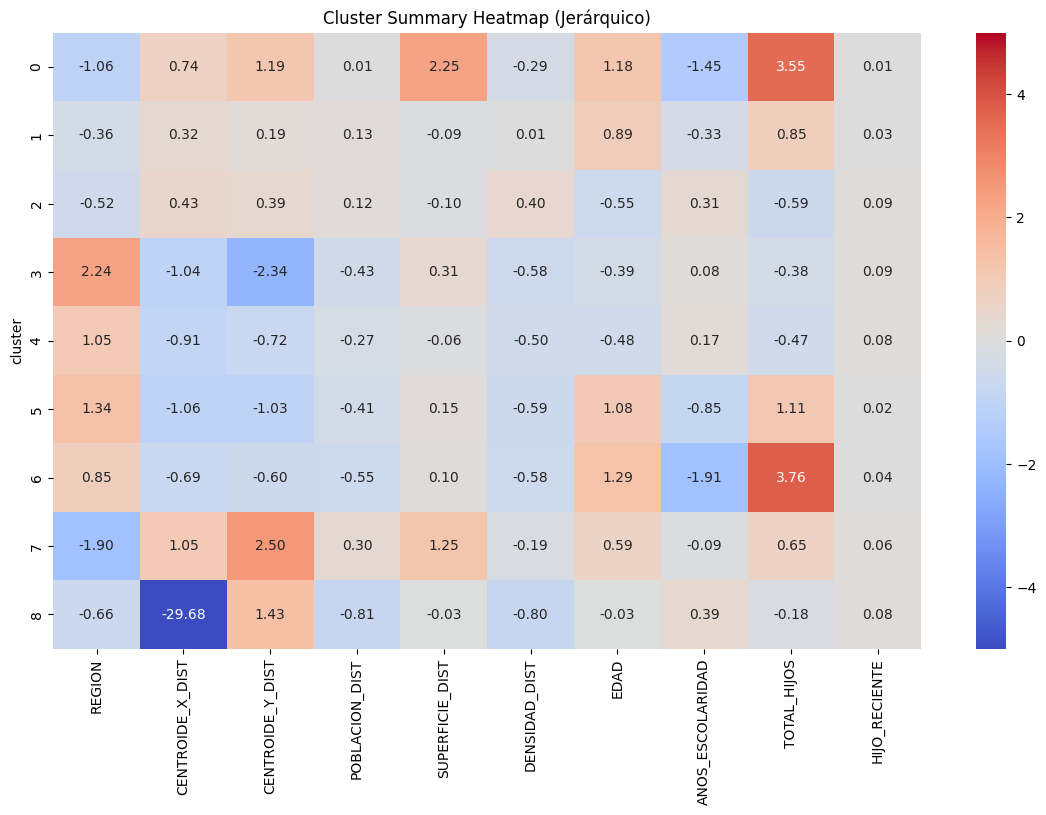

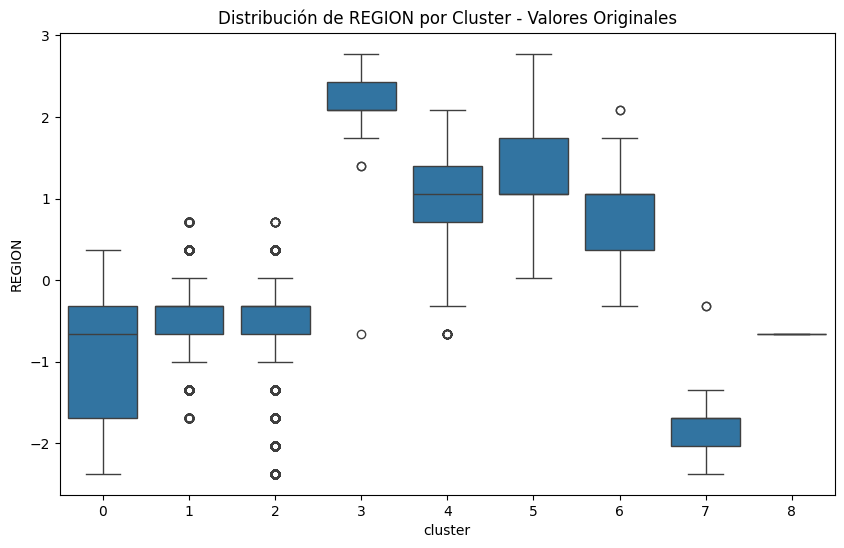

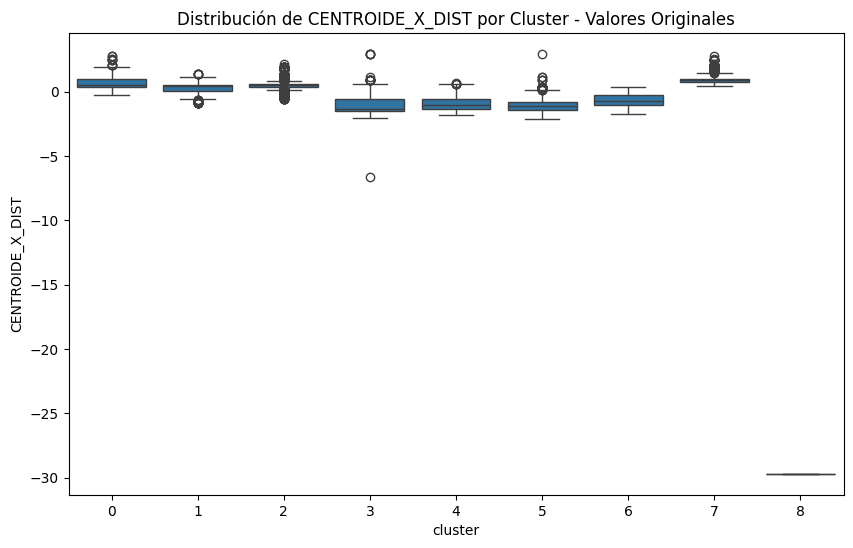

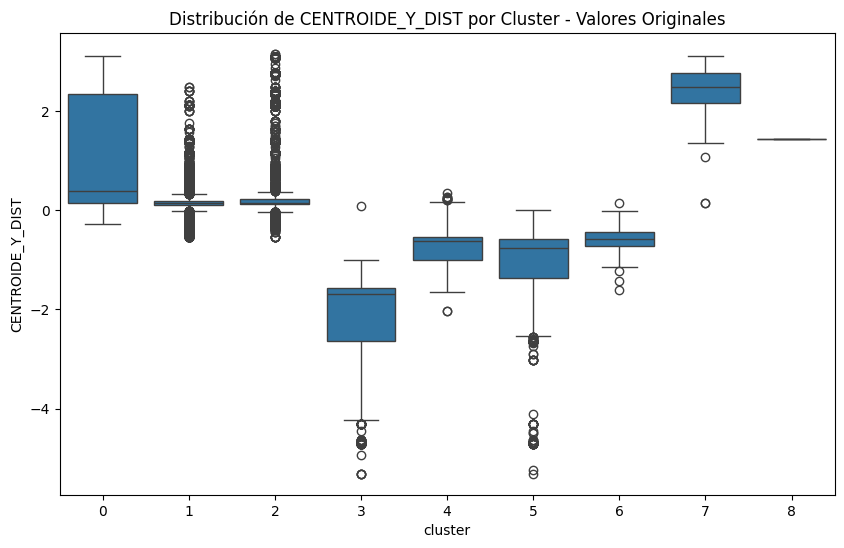

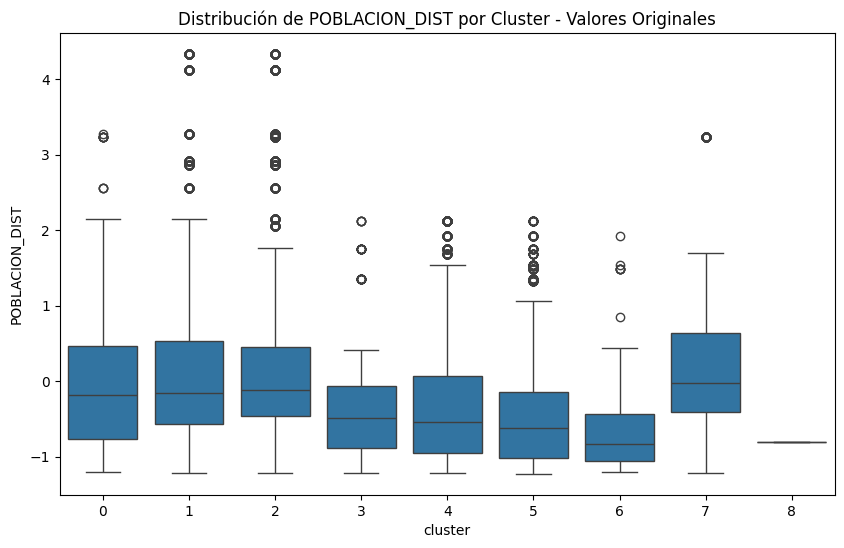

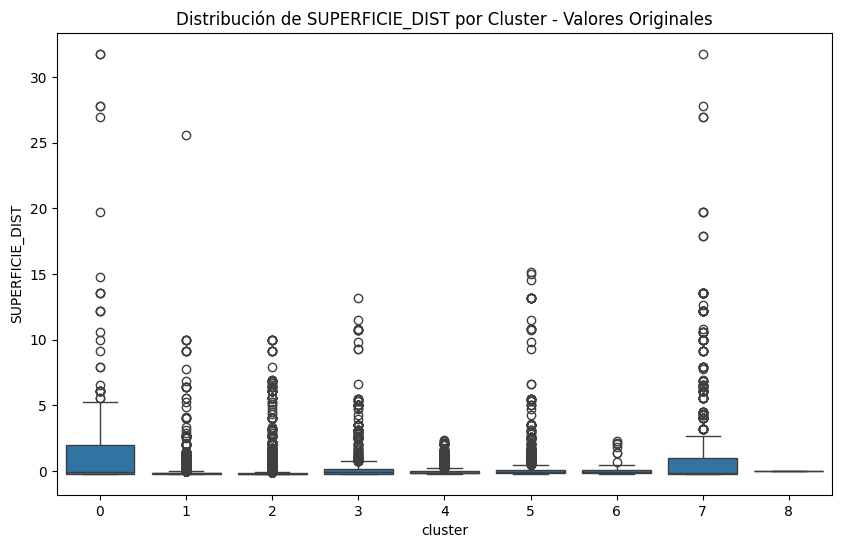

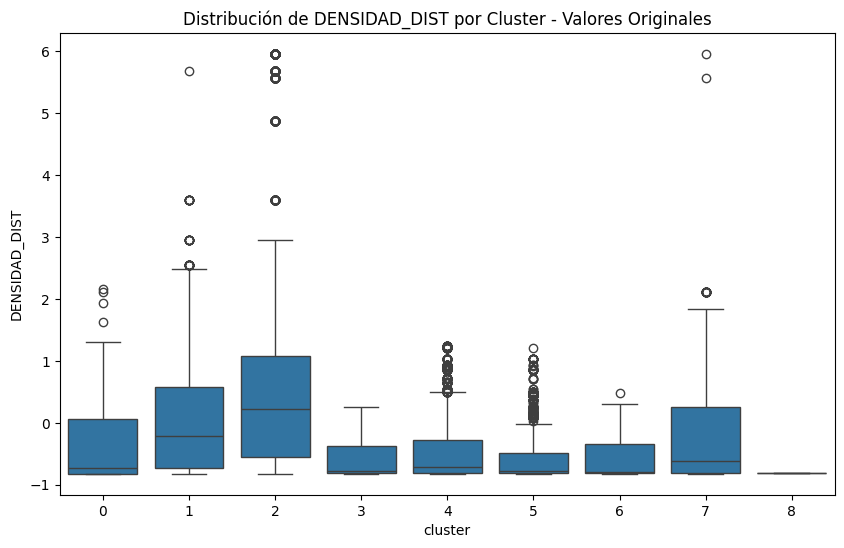

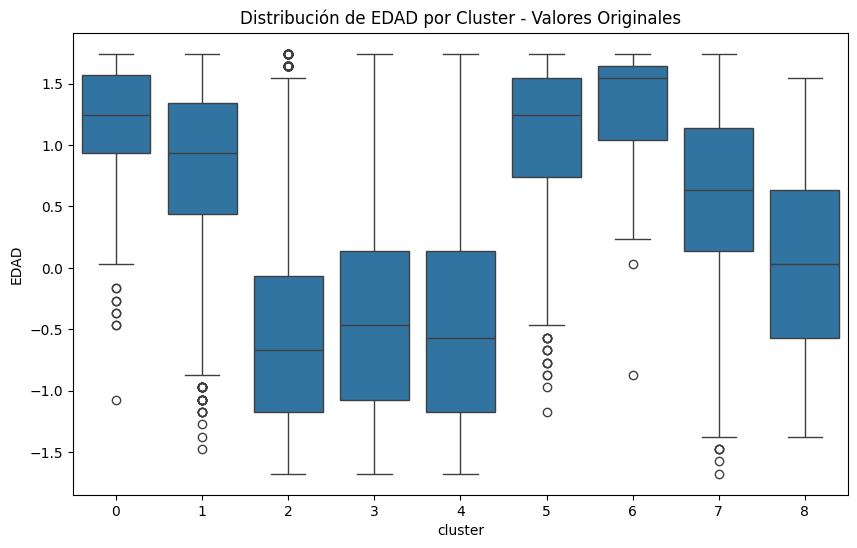

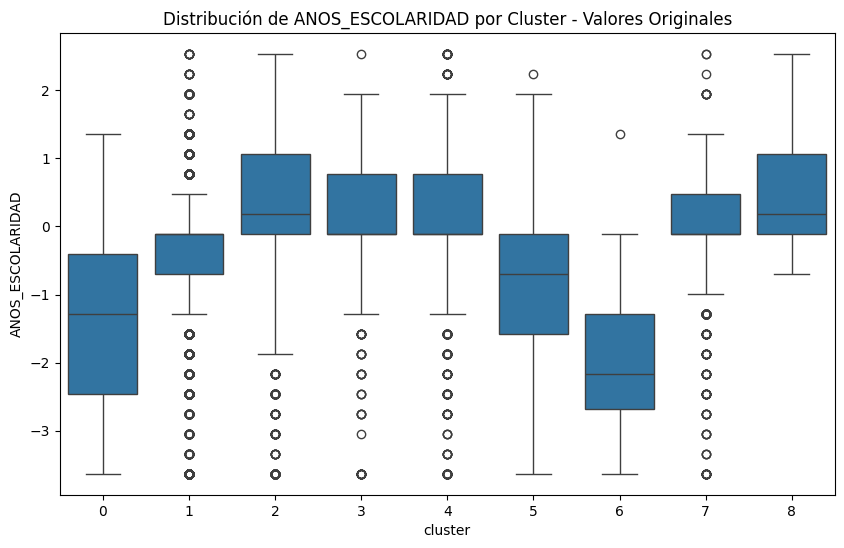

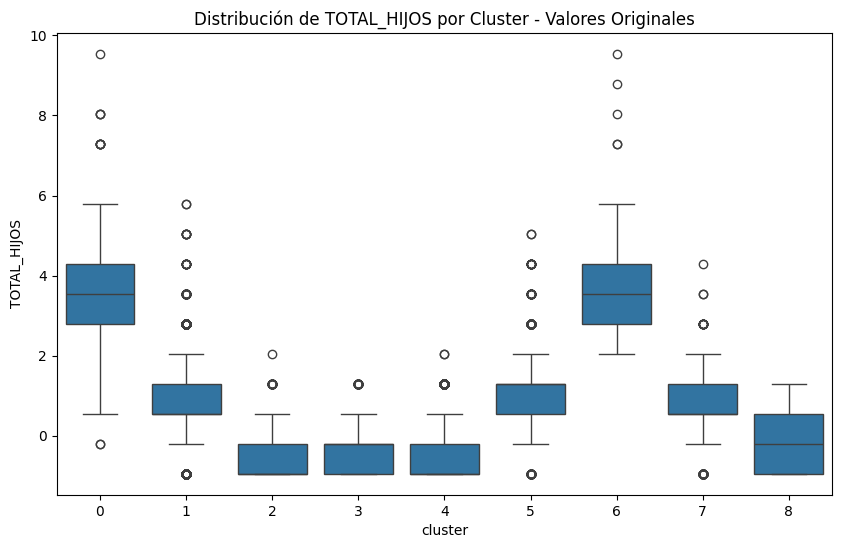

In [ ]:
df_pca_hier = df_pca_subsample.copy()
df_pca_hier['cluster'] = ward_dist.labels_

# Fusionar con datos originales
df_pca_hier['index'] = df_pca_subsample.index
X['index'] = X.index
df_merged = pd.merge(X, df_pca_hier[['index', 'cluster']], on='index', how='inner')
df_merged.drop(columns=['index'], inplace=True)

# Resumen estadístico de las características por cluster con valores originales
cluster_summary_original = df_merged.groupby('cluster').mean()
print(cluster_summary_original)

# Visualización
import seaborn as sns

plt.figure(figsize=(14, 8))
sns.heatmap(cluster_summary_original, annot=True, cmap="coolwarm", fmt=".2f", vmin=-5, vmax=5)
plt.title("Cluster Summary Heatmap (Jerárquico)")
plt.show()

# Visualización detallada de cada variable por cluster con valores originales
for column in normalize_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='cluster', y=column, data=df_merged)
    plt.title(f"Distribución de {column} por Cluster - Valores Originales")
    plt.show()


In [ ]:
# Resumen estadístico de las características por cluster
cluster_summary = df_merged.groupby('cluster').mean()
print(cluster_summary)


           REGION  CENTROIDE_X_DIST  CENTROIDE_Y_DIST  POBLACION_DIST  \
cluster                                                                 
0       -0.535682          0.378102          0.352243        0.028766   
1        0.846303         -0.685178         -0.598334       -0.553541   
2        2.064114         -1.112901         -2.032088       -0.363548   
3        1.011204         -0.867054         -0.698913       -0.307646   
4       -0.408667          0.396808          0.233416        0.146368   
5       -0.450082          0.373768          0.246204        0.124966   
6       -1.893048          1.097724          2.498921        0.309803   
7       -0.656091        -29.681969          1.433935       -0.806570   
8        2.063168         -1.104223         -2.000597       -0.732479   
9       -1.957251          1.028662          2.599297        0.384996   
10       0.971140         -0.809349         -0.684869       -0.403003   

         SUPERFICIE_DIST  DENSIDAD_DIST      EDAD 

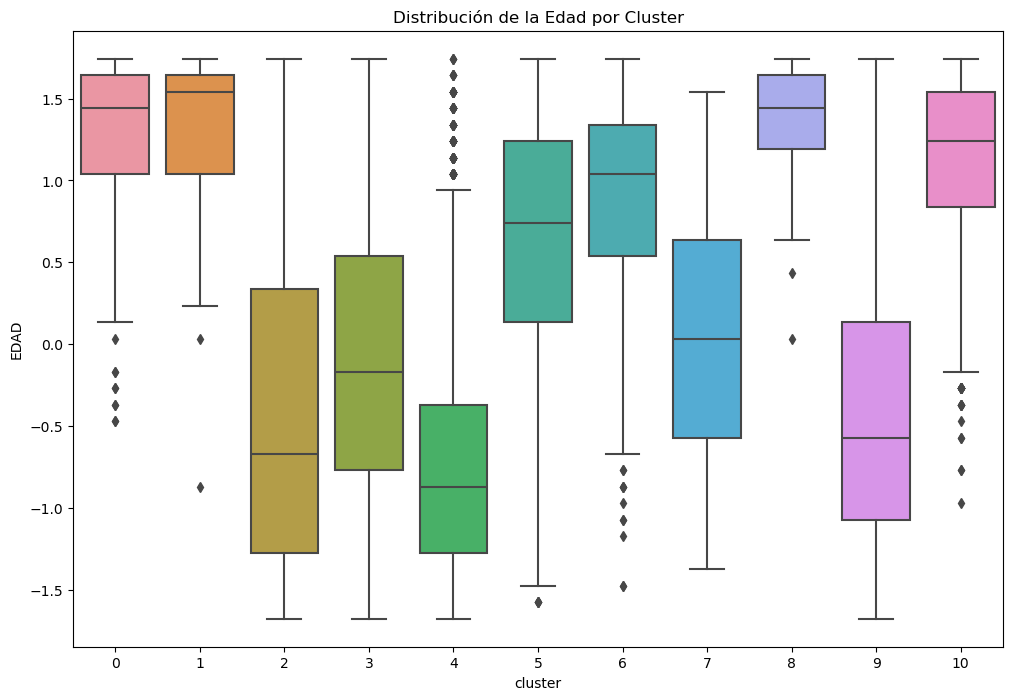

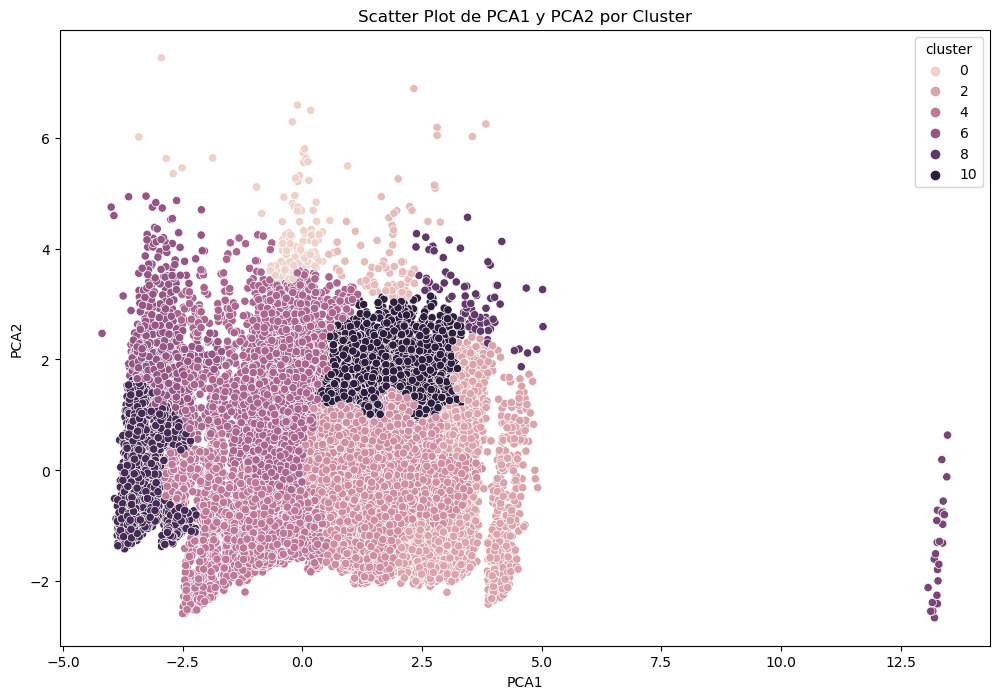

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ejemplo de boxplot para una variable específica
plt.figure(figsize=(12, 8))
sns.boxplot(x='cluster', y='EDAD', data=df_merged)
plt.title('Distribución de la Edad por Cluster')
plt.show()

# Ejemplo de scatter plot para dos variables específicas
plt.figure(figsize=(12, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='cluster', data=df_pca_subsample)
plt.title('Scatter Plot de PCA1 y PCA2 por Cluster')
plt.show()


In [ ]:
import pandas as pd

# Crear un DataFrame con los datos y las etiquetas de los clusters
df_clusters = pd.DataFrame(new_X, columns=['Feature1', 'Feature2'])
df_clusters['Cluster'] = labels

# Calcular estadísticas descriptivas para cada cluster
cluster_summary = df_clusters.groupby('Cluster').describe()
print(cluster_summary)

        Feature1                                                        \
           count       mean       std        min        25%        50%   
Cluster                                                                  
0         5930.0  -1.147195  1.090409  -4.183735  -1.614262  -0.681355   
1         3267.0   2.923764  0.687404   1.688927   2.457311   2.871270   
2        12122.0  -1.148072  0.798239  -3.921732  -1.165128  -0.916213   
3        15814.0   0.428590  1.017455  -1.035265  -0.460098   0.063570   
4           76.0  -2.873463  0.385649  -3.993036  -3.116831  -2.860531   
5           79.0   3.517694  0.628934   2.375144   3.067901   3.536892   
6           14.0   1.176127  1.526223  -0.208774   0.033525   0.146133   
7           25.0  13.290292  0.102329  13.073470  13.229774  13.270302   
8          531.0   0.299454  0.709055  -0.956527  -0.123517   0.042628   
9         2142.0   1.781372  0.761075   0.347025   1.140583   1.760578   

                              Feature

### OPTICS

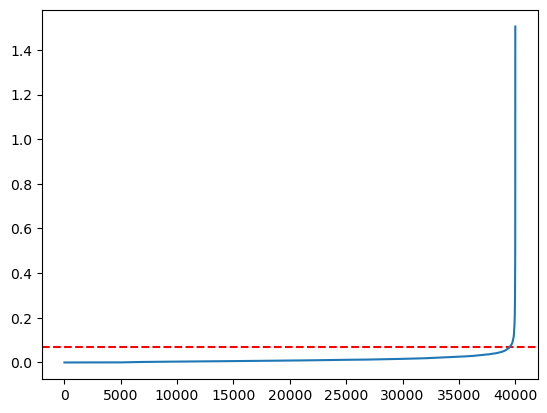

In [ ]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
from sklearn.cluster import DBSCAN

data_dbscan = df_pca_subsample
nbrs = NearestNeighbors(n_neighbors=250).fit(data_dbscan)
distances, indices = nbrs.kneighbors(data_dbscan)

distances = np.sort(distances, axis=0)
distances = distances[:,1]

fig, ax = plt.subplots()

ax.axhline(y=0.07, color='r', linestyle='--') # Ajuste el valor para y
ax.plot(distances)

plt.show()

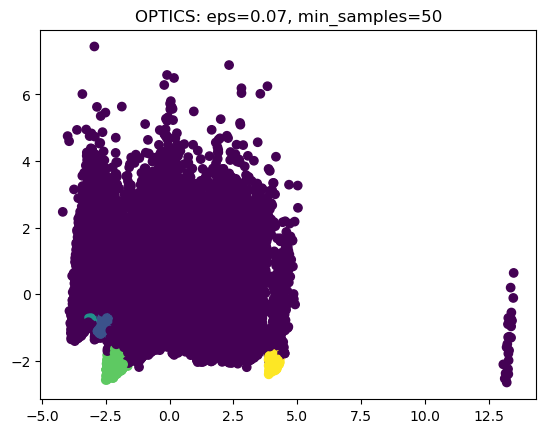

In [ ]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
from sklearn.cluster import OPTICS
data_dbscan = df_pca_subsample

eps = 0.07
min_samples = 50

dbscan = OPTICS(eps=eps, min_samples=min_samples).fit(data_dbscan)
plt.scatter(data_dbscan['PCA1'], data_dbscan['PCA2'], c=dbscan.labels_)
plt.title(f"OPTICS: eps={eps}, min_samples={min_samples}")
plt.show()

Número de clústeres identificados: 4


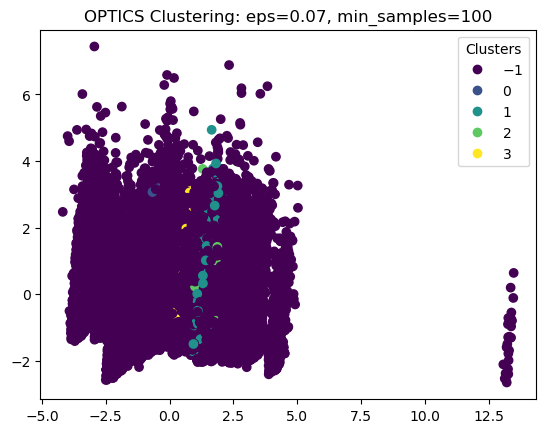

             PCA1      PCA2         index   cluster
Cluster                                            
-1      -0.019796 -0.001210  2.177380e+06  4.548734
 0      -0.735750 -0.181606  7.479989e+05  4.468085
 1       1.357239  0.258896  2.528189e+06  4.894382
 2       1.420572 -0.199423  2.975054e+06  4.169231
 3       0.471925  0.186392  3.242336e+06  4.626437
             PCA1      PCA2         index   cluster
Cluster                                            
-1       1.602955  1.293325  1.271572e+06  1.866800
 0       0.215410  1.166598  3.269624e+03  0.500759
 1       0.250382  1.370083  1.215461e+04  3.171536
 2       0.430850  1.287508  3.538308e+03  2.647621
 3       0.161977  1.226234  5.182456e+03  2.520114


In [ ]:
# 1. Obtener la cantidad de clústeres únicos
unique_labels = np.unique(dbscan.labels_)
n_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)  # Excluir el ruido si existe
print(f"Número de clústeres identificados: {n_clusters}")

# 2. Asignar las etiquetas al DataFrame
data_dbscan['Cluster'] = dbscan.labels_

# 3. Visualización de los clústeres
plt.figure()
scatter = plt.scatter(data_dbscan['PCA1'], data_dbscan['PCA2'], c=data_dbscan['Cluster'], cmap='viridis')
plt.title(f"OPTICS Clustering: eps={eps}, min_samples={min_samples}")
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.show()

# 4. Analizar los datos de cada clúster
cluster_summary = data_dbscan.groupby('Cluster').mean()
print(cluster_summary)

# Si deseas obtener más detalles de cada clúster, puedes también calcular la desviación estándar:
cluster_summary_std = data_dbscan.groupby('Cluster').std()
print(cluster_summary_std)


### Matriz de similitud y coef. de Silhouette


In [10]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Escriba su código aquí
def sim_matrix(features, labels):
    useful_labels = labels >= 0

    # primero ordenamos los datos en base al cluster que pertencen
    indices = np.argsort(labels[useful_labels])
    sorted_features = features[useful_labels][indices]

    # calculamos las similitud entre todos los puntos
    d = cosine_similarity(sorted_features, sorted_features)
    return d

def plot(data, model):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

    fig.suptitle(f"{model.__class__.__name__}")

    ax1.scatter(data[:,0], data[:,1], c=model.labels_)

    sim = sim_matrix(data, model.labels_)
    im = ax2.imshow(sim, cmap='cividis', vmin=0.0, vmax=1.0)
    fig.colorbar(im, ax=ax2)

#plot(data_kmeans, kmeans5)
#plt.show()

plot(new_X, ward_dist)
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

#print("Dataset X K-Means 4\t", silhouette_score(X_pca, kmeans5.labels_))
#print("Dataset X K-Means 7\t", silhouette_score(X_pca, kmeans6.labels_))
print("Dataset X Ward Complete\t", silhouette_score(data_jerarquico.values, ward_dist.labels_))
_filter_label = dbscan.labels_ >= 0
print("Dataset X OPTICS\t", silhouette_score(data_dbscan.values[_filter_label], dbscan.labels_[_filter_label]))

Dataset X Ward Complete	 0.28056607629233105
Dataset X OPTICS	 0.6875993652241311
